### 1. 목표설정
- 보스턴 집값 데이터를 이용해서 회귀분석을 진행해보자.
- 특성 곱을 이용해서 새로운 특성을 만들어보자.
- 규제 모델을 이용해서 모델의 복잡도를 제어해보자.

### 2. 데이터 수집
- csv 파일 불러오기(보스턴 주택 데이터)

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
boston = pd.read_csv('./data/boston_housing.csv')

In [3]:
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# 필요없는 Unnamed 컬럼 삭제
boston.drop('Unnamed: 0' , axis = 1, inplace = True)

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**결측치 없음!**

**특성정보 확인**
- CRIM : 범죄율
- INDUS : 도매상업지역에서의 면적
- NOX : 대기 중 일산화질소의 농도
- RM : 주택 당 방의 갯수
- LSTAT : 인구 중 하위 계층의 비율
- B : 인구 중 흑인 비율
- PITRATIO : 학생 / 교사 비율
- ZN : 25,000평방 피트를 초과한 거주지역의 비율
- CHAS : 찰스 강의 경계에 위치한 경우는 1, 아닌 경우는 0
- AGE : 1940년 이전에 지어진 주택의 비율
- DIS : 직업 센터의 거리
- TAX : 재산세율

**종속변수 확인**
- MEDV : 집값, 주택가격

### 3. 데이터 전처리
- 결측치 없었다!
- 보스턴 주택 데이터는 학습용으로 제공된 데이터라 전처리가 필요없다(데이터가 깔끔함)

### 4. 탐색적 데이터 분석
- 생략

### 5. 모델링
- 데이터 분리(X_train, X_test, y_train, y_test)
- 모델 선정 및 학습/평가/예측

In [6]:
# 데이터의 분리
# step1 : 데이터를 분리하기 위한 모듈 불러오기
from sklearn.model_selection import train_test_split
X = boston.drop('MEDV', axis = 1)
y = boston['MEDV']
# step2 : 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.31,
                                                   random_state=8)
# step3 : 데이터 분할 확인하기
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((349, 13), (157, 13), (349,), (157,))

In [7]:
# 분할된 데이터를 가지고 상관계수를 확인하기
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.184817,0.378316,-0.061804,0.403027,-0.174240,0.341431,-0.363133,0.594872,0.545241,0.269811,-0.347409,0.422540
ZN,-0.184817,1.000000,-0.524860,-0.030235,-0.514637,0.354517,-0.561653,0.639337,-0.305356,-0.316457,-0.382791,0.182498,-0.435246
INDUS,0.378316,-0.524860,1.000000,0.037579,0.770848,-0.396145,0.643074,-0.711269,0.582916,0.727380,0.384198,-0.360666,0.616574
CHAS,-0.061804,-0.030235,0.037579,1.000000,0.089458,0.052451,0.072935,-0.091399,-0.020382,-0.061107,-0.174097,0.047781,-0.052901
NOX,0.403027,-0.514637,0.770848,0.089458,1.000000,-0.332745,0.711182,-0.763106,0.624177,0.680614,0.217253,-0.377686,0.624415
RM,-0.174240,0.354517,-0.396145,0.052451,-0.332745,1.000000,-0.256279,0.219211,-0.187175,-0.278136,-0.344753,0.111318,-0.593509
AGE,0.341431,-0.561653,0.643074,0.072935,0.711182,-0.256279,1.000000,-0.715271,0.457093,0.507352,0.276290,-0.269051,0.607571
DIS,-0.363133,0.639337,-0.711269,-0.091399,-0.763106,0.219211,-0.715271,1.000000,-0.491662,-0.541043,-0.240381,0.296180,-0.500062
RAD,0.594872,-0.305356,0.582916,-0.020382,0.624177,-0.187175,0.457093,-0.491662,1.000000,0.894437,0.456515,-0.461684,0.475693
TAX,0.545241,-0.316457,0.727380,-0.061107,0.680614,-0.278136,0.507352,-0.541043,0.894437,1.000000,0.461836,-0.452291,0.541115


<Axes: >

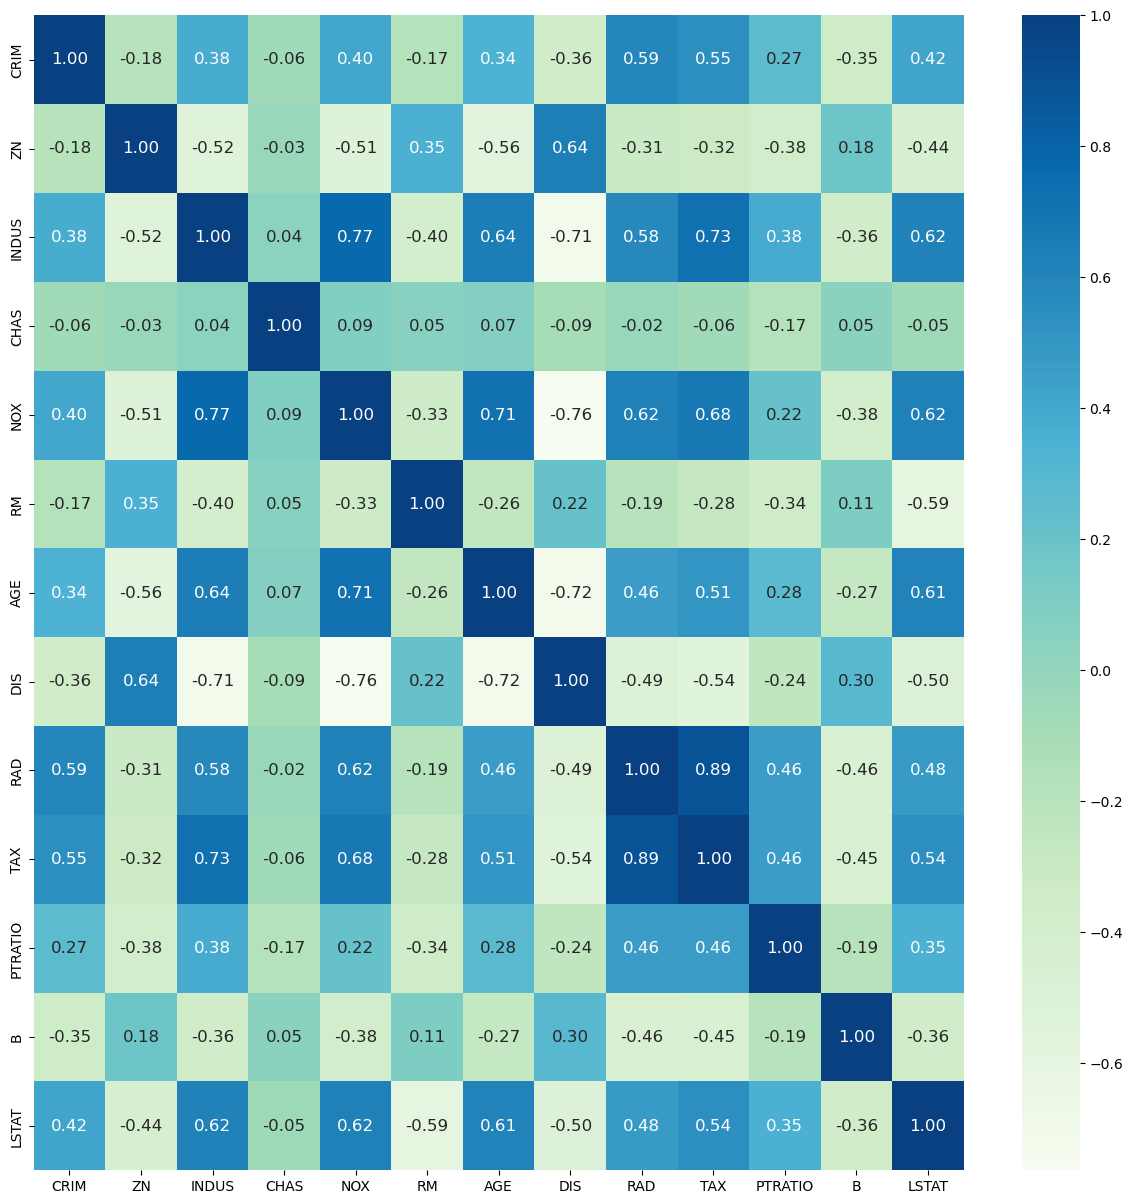

In [8]:
# 상관계수를 히트맵으로 출력
plt.figure(figsize=(15,15))
sns.heatmap(data = X_train.corr(),
           annot = True, # 히트맵 내부에 글씨 출력
           annot_kws = {'size' : 12}, # 내부 글씨의 옵션(글씨의 크기)
           fmt = '.2f',
           cmap = 'GnBu'
           )

In [9]:
# 선형 회귀 모델 사용하기
# Step.1 : 모델 import
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [10]:
# Step. 2 : 모델 객체 생성
linear_model = LinearRegression()

In [11]:
# Step. 3 : 모델 학습
linear_model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Step. 4 : 교차 검증 
max_rs = 0
max_i = 0
for i in range(3, 51, 2):
    rs = cross_val_score(linear_model, X_train, y_train, cv = i)
    if sum(rs) / i > max_rs:
        max_rs = sum(rs) / i
        max_i = i
print(max_rs)
print(max_i)
print(max_rs.mean())

0.7067882464034808
3
0.7067882464034808


In [13]:
# 가중치 w 값 확인해보기
linear_model.coef_

array([-1.08457730e-01,  4.99972455e-02,  2.17330703e-02,  2.43217522e+00,
       -1.19450485e+01,  3.87798265e+00, -8.12873290e-03, -1.35614446e+00,
        2.89676239e-01, -1.12635102e-02, -9.66591078e-01,  1.06027147e-02,
       -5.80034262e-01])

In [14]:
# 편향 b값 확인해보기
linear_model.intercept_

33.21001376649663

In [15]:
pre = linear_model.predict(X_test)
pre

array([19.39040546, 10.59968152, 38.49037097, 27.26581118, 41.04993232,
       27.44115716, 10.49189064, 36.29245346, 29.20896504, 34.93928463,
       12.88753787,  7.43423798, 15.00719896, 24.18790736, 15.81799744,
       28.9585664 , 23.31496833, 22.49926256, 21.14612041,  6.93378704,
       21.21573138, 25.772686  , 30.64063831, 33.39741899, 28.84922318,
       35.44566731,  4.97275369, 14.17356247, 25.45515186, 23.45946365,
       34.86001234, 18.67204377, 19.16912818, 22.50379921, 25.89341456,
       27.28253062, 32.88330414, 25.63745378, 13.85703805, 14.15266597,
       21.33094899, 22.17932619, 36.09406382, 35.4244277 , 23.65810312,
       19.67375808, 20.00583118, 21.45005649, 25.81654039, 24.24877486,
       20.24463537, 16.55769278, 32.32618697, 16.28602942, 22.09329894,
       24.92191   , 20.75436765,  5.00547371, 20.30164768, 28.68866508,
       24.76820836, 21.89461393, 20.32983437,  8.54574941, 13.9961636 ,
       17.6998372 , 12.63194731, 20.49820569, 35.55247421, 35.71

### 평가지표
- 회귀 평가 지표를 이용해서, 모델을 평가해보자
- MSE, MAE, RSME, R2 스코어

In [16]:
# 평가지표 : import
# sklearn.metrics : 평가지표
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [17]:
# MSE 사용하기
mean_squared_error(pre, y_test)

24.35928694101283

In [18]:
# RMSE 사용하기
# 사이킷런 내부에서는 RSME를 지원하지 않는다. -> 넘파이에 있는 sqrt 함수를 사용해야 한다.
mean_squared_error(pre, y_test)

24.35928694101283

In [19]:
# MAE 사용하기
mean_absolute_error(pre, y_test)

3.52811293751381

In [20]:
# r2스코어 사용하기
r2_score(pre, y_test)

0.6581175354481736

In [21]:
# 스코어 함수 사용하기
linear_model.score(X_test, y_test)

0.6953097656779009

- 현재 회귀 모델은 성능이 그렇게 좋은 편이 아닌 것 같다.
- 일반적으로 선형회귀모델은 데이터의 특성이 많을수록 성능이 좋아진다.
- 특성이 적은 경우 선형회귀 모델이 간단해진다(단순해진다). -> 성능이 낮아질 수 밖에 없다.
- 모델을 제어할 수 있는 하이퍼 파라미터 조정이 불가능하기 때문이다.
- 특성 곱을 이용해서 새로운 특성을 만들어보자

**원본 데이터 프레임 복사하기**

In [22]:
# copy() : 데이터 프레임의 현재 상태를 복사 / 복사 당시의 프레임 상태만 복사하는 깊은 복사 
X_train_copy = X_train

In [23]:
X_train_copy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46
426,12.24720,0.0,18.10,0.0,0.584,5.837,59.7,1.9976,24.0,666.0,20.2,24.65,15.69
234,0.44791,0.0,6.20,1.0,0.507,6.726,66.5,3.6519,8.0,307.0,17.4,360.20,8.05
438,13.67810,0.0,18.10,0.0,0.740,5.935,87.9,1.8206,24.0,666.0,20.2,68.95,34.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.32982,0.0,21.89,0.0,0.624,5.822,95.4,2.4699,4.0,437.0,21.2,388.69,15.03
361,3.83684,0.0,18.10,0.0,0.770,6.251,91.1,2.2955,24.0,666.0,20.2,350.65,14.19
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10
340,0.06151,0.0,5.19,0.0,0.515,5.968,58.5,4.8122,5.0,224.0,20.2,396.90,9.29


In [24]:
# 기존의 훈련용 문제 데이터에 훈련용 정답 컬럼을 추가해주자
#정답을 포함한 상관관계를 파악하기 뤼해서! 정답 컬럼을 추가!
X_train_copy['MEDV'] = y_train

In [27]:
# 데이터 프레임 형태 바꼈다. -> shape, info
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 424 to 451
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     349 non-null    float64
 1   ZN       349 non-null    float64
 2   INDUS    349 non-null    float64
 3   CHAS     349 non-null    float64
 4   NOX      349 non-null    float64
 5   RM       349 non-null    float64
 6   AGE      349 non-null    float64
 7   DIS      349 non-null    float64
 8   RAD      349 non-null    float64
 9   TAX      349 non-null    float64
 10  PTRATIO  349 non-null    float64
 11  B        349 non-null    float64
 12  LSTAT    349 non-null    float64
 13  MEDV     349 non-null    float64
dtypes: float64(14)
memory usage: 40.9 KB


In [30]:
# 훈련용 데이터의 상관관계 확인
X_train_copy.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.184817,0.378316,-0.061804,0.403027,-0.174240,0.341431,-0.363133,0.594872,0.545241,0.269811,-0.347409,0.422540,-0.368988
ZN,-0.184817,1.000000,-0.524860,-0.030235,-0.514637,0.354517,-0.561653,0.639337,-0.305356,-0.316457,-0.382791,0.182498,-0.435246,0.408057
INDUS,0.378316,-0.524860,1.000000,0.037579,0.770848,-0.396145,0.643074,-0.711269,0.582916,0.727380,0.384198,-0.360666,0.616574,-0.498630
CHAS,-0.061804,-0.030235,0.037579,1.000000,0.089458,0.052451,0.072935,-0.091399,-0.020382,-0.061107,-0.174097,0.047781,-0.052901,0.171910
NOX,0.403027,-0.514637,0.770848,0.089458,1.000000,-0.332745,0.711182,-0.763106,0.624177,0.680614,0.217253,-0.377686,0.624415,-0.449706
RM,-0.174240,0.354517,-0.396145,0.052451,-0.332745,1.000000,-0.256279,0.219211,-0.187175,-0.278136,-0.344753,0.111318,-0.593509,0.684011
AGE,0.341431,-0.561653,0.643074,0.072935,0.711182,-0.256279,1.000000,-0.715271,0.457093,0.507352,0.276290,-0.269051,0.607571,-0.413605
DIS,-0.363133,0.639337,-0.711269,-0.091399,-0.763106,0.219211,-0.715271,1.000000,-0.491662,-0.541043,-0.240381,0.296180,-0.500062,0.273782
RAD,0.594872,-0.305356,0.582916,-0.020382,0.624177,-0.187175,0.457093,-0.491662,1.000000,0.894437,0.456515,-0.461684,0.475693,-0.372625
TAX,0.545241,-0.316457,0.727380,-0.061107,0.680614,-0.278136,0.507352,-0.541043,0.894437,1.000000,0.461836,-0.452291,0.541115,-0.468262


- 현재 MEDV컬럼의 상관관계가 뒤죽박죽 섞여있다. 정리를 해서 확인해보자

In [34]:
# 내부와 상관 계수 값을 절대 값으로 변경
X_train_abs = X_train_copy.corr().abs()
# 절대 값으로 변경은 상관 계수를 내림차순으로 정렬해보자(기준은 MEDV)
X_train_abs.sort_values(by = 'MEDV', ascending = False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,0.368988,0.408057,0.498630,0.171910,0.449706,0.684011,0.413605,0.273782,0.372625,0.468262,0.512201,0.339353,0.753252,1.000000
LSTAT,0.422540,0.435246,0.616574,0.052901,0.624415,0.593509,0.607571,0.500062,0.475693,0.541115,0.353558,0.363635,1.000000,0.753252
RM,0.174240,0.354517,0.396145,0.052451,0.332745,1.000000,0.256279,0.219211,0.187175,0.278136,0.344753,0.111318,0.593509,0.684011
PTRATIO,0.269811,0.382791,0.384198,0.174097,0.217253,0.344753,0.276290,0.240381,0.456515,0.461836,1.000000,0.190627,0.353558,0.512201
INDUS,0.378316,0.524860,1.000000,0.037579,0.770848,0.396145,0.643074,0.711269,0.582916,0.727380,0.384198,0.360666,0.616574,0.498630
TAX,0.545241,0.316457,0.727380,0.061107,0.680614,0.278136,0.507352,0.541043,0.894437,1.000000,0.461836,0.452291,0.541115,0.468262
NOX,0.403027,0.514637,0.770848,0.089458,1.000000,0.332745,0.711182,0.763106,0.624177,0.680614,0.217253,0.377686,0.624415,0.449706
AGE,0.341431,0.561653,0.643074,0.072935,0.711182,0.256279,1.000000,0.715271,0.457093,0.507352,0.276290,0.269051,0.607571,0.413605
ZN,0.184817,1.000000,0.524860,0.030235,0.514637,0.354517,0.561653,0.639337,0.305356,0.316457,0.382791,0.182498,0.435246,0.408057
RAD,0.594872,0.305356,0.582916,0.020382,0.624177,0.187175,0.457093,0.491662,1.000000,0.894437,0.456515,0.461684,0.475693,0.372625


- 상관관계의 범위는 -1 ~ 1
- 현재 절대 값으로 변경된 상관관계수를 확인 ->같은 컬럼을 제외한 상관계수가 높은 컬럼 2개를 찾아보자
- LSTAT과 RM이라는 컬럼이 상관관계가 높았다. -> 이 두가지의 컬럼을 가지고 특성 곱이라는 확장을 진행해보자

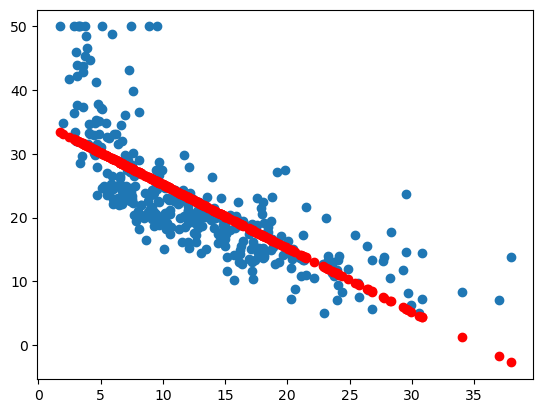

In [35]:
# 상관관계가 높은 데이터를 가지고 특성 확장래보기
#확장전) 먼저 LSTAT 특성만 가지고 학습시킨 후 예측을 어떻게 하는지 시각화
#모델 학습-> LSTAT만 가지고 학습
model = LinearRegression()
model.fit(X_train[['LSTAT']], y_train)
pre = model.predict(X_train[['LSTAT']])

# 차트 그려보기 -> 스캐터 차트 두개 그려보기(실제 데이터, 예측 데이터)
plt.scatter(X_train['LSTAT'], y_train) # -> tlfwp epdlxj tmzoxj ckxm
plt.scatter(X_train['LSTAT'], pre, color='red')
plt.show()

- LSTAT으로만 예측한 데이터는 직선의 형태를 뛰고 있다.
- 확장 후의 데이터를 확인해보자.

In [36]:
# 특성확장 후 : 본래 LSTAT 특성과 확장 LSTAT 특성을 가지고 학습시킨 후 예측을 어떻게 하는지 보자
X_train['LSTAT x LSTAT'] = X_train['LSTAT'] * X_train['LSTAT']


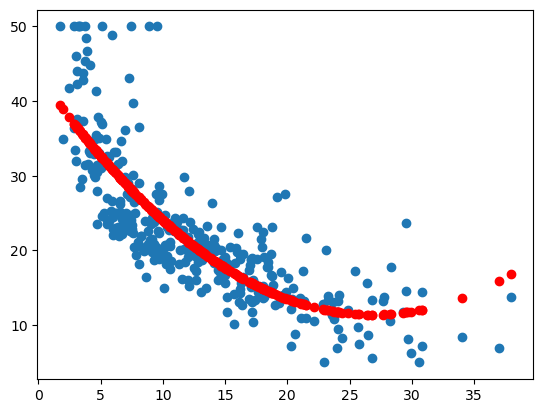

In [38]:
# 모델 학습 
model2 = LinearRegression()
model2.fit(X_train[['LSTAT', 'LSTAT x LSTAT']], y_train)
pre = model2.predict(X_train[['LSTAT', 'LSTAT x LSTAT']])

# 차트 그려보기
plt.scatter(X_train['LSTAT'], y_train) # ->실제 데이터 스캐터 차트
plt.scatter(X_train['LSTAT'], pre, color='red') # -> 예측 데이터 스캐터 차트
plt.show()

- 직선의 형태가 아니네? ->곡선이면 비선형인가?
- 다항 회귀의 이해가 필요하다
- 다항 회귀 : 독립변수의단항식이 아닌(독립변수 x가 1개가 아닌) 2차, 3차 방정식과 같은 다항식으로 표현된 것이 다항 회귀라고 한다!

<font color = 'red'>주의)<br>
1. 다항 회귀를 선형이 아닌 비선형으로 혼동할 수 있다. -> 선형회귀라는 것을 기억하자<br>
2. 선형/비선형 회귀를 나누는 기준? -> 가중치(회귀 계수, W)가 선형 / 비선형인지를 확인해보자<br>
3. 독립변수(문제 데이터, 특성, x)가 선형/ 비선형인지를 따르지 않는다.
</font>

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 424 to 451
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           349 non-null    float64
 1   ZN             349 non-null    float64
 2   INDUS          349 non-null    float64
 3   CHAS           349 non-null    float64
 4   NOX            349 non-null    float64
 5   RM             349 non-null    float64
 6   AGE            349 non-null    float64
 7   DIS            349 non-null    float64
 8   RAD            349 non-null    float64
 9   TAX            349 non-null    float64
 10  PTRATIO        349 non-null    float64
 11  B              349 non-null    float64
 12  LSTAT          349 non-null    float64
 13  MEDV           349 non-null    float64
 14  LSTAT x LSTAT  349 non-null    float64
dtypes: float64(15)
memory usage: 43.6 KB


In [48]:
X_train.drop('MEDV', axis=1, inplace = True)

In [49]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 337 to 294
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           157 non-null    float64
 1   ZN             157 non-null    float64
 2   INDUS          157 non-null    float64
 3   CHAS           157 non-null    float64
 4   NOX            157 non-null    float64
 5   RM             157 non-null    float64
 6   AGE            157 non-null    float64
 7   DIS            157 non-null    float64
 8   RAD            157 non-null    float64
 9   TAX            157 non-null    float64
 10  PTRATIO        157 non-null    float64
 11  B              157 non-null    float64
 12  LSTAT          157 non-null    float64
 13  LSTAT x LSTAT  157 non-null    float64
dtypes: float64(14)
memory usage: 18.4 KB


In [50]:
# X_test에도 확장 LSTAT을 추가 시켜보자
X_test['LSTAT x LSTAT'] = X_test['LSTAT'] * X_test['LSTAT']

In [51]:
# 모델 객체 생성
model = LinearRegression()

In [52]:
# 모델 학습
model.fit(X_train, y_train) # 이때 X_train에는 확장된 LSTAT 컬럼 추가

LinearRegression()

In [53]:
# 모델 평가
model.score(X_test, y_test)

0.7589772228178321

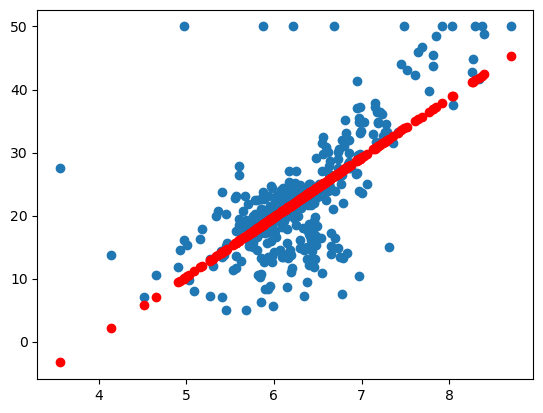

In [59]:
# 특성 확장 하나 더 추가해봅시다.
# 상관관계가 높았던 RM이라는 컬럼도 특성 확장을 추가
#상관관계가 높은 데이터를 가지고 특성 확장 해보기
#확장전) 먼저 RM 특성만 가지고 학습 시킨 후 예측을 어떻게 하는지 시각화
# 모델 학습 
model2 = LinearRegression()
model2.fit(X_train[['RM']], y_train)
pre = model2.predict(X_train[['RM']])

# 차트 그려보기
plt.scatter(X_train['RM'], y_train) # ->실제 데이터 스캐터 차트
plt.scatter(X_train['RM'], pre, color='red') # -> 예측 데이터 스캐터 차트
plt.show()

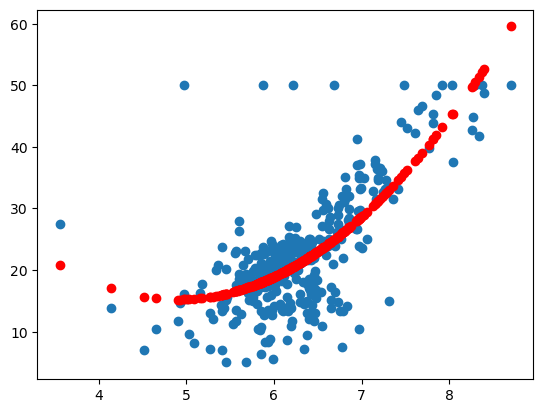

In [67]:
# 특성 확장 후 : 본래 RM 특성과 확장 RM 특성을 가지고 학습 시킨 후 예측을 어떻게 하는지 보자 
X_train['RM x RM'] = X_train['RM'] * X_train['RM'] # 특성 추가 확장
# 모델 학습 
model2 = LinearRegression()
model2.fit(X_train[['RM', 'RM x RM']], y_train)
pre = model2.predict(X_train[['RM', 'RM x RM']])

# 차트 그려보기 -> 스캐터 차트 두개 그려보기 (실제 데이터, 예측 데이터)
plt.scatter(X_train['RM'], y_train) # -> 실제 데이터 스캐터 차트
plt.scatter(X_train['RM'], pre, color='red') # -> 예측 데이터 스캐터 차트
plt.show()

In [68]:
# RM특성 확장해서 실제 평가까지 진행
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 424 to 451
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           349 non-null    float64
 1   ZN             349 non-null    float64
 2   INDUS          349 non-null    float64
 3   CHAS           349 non-null    float64
 4   NOX            349 non-null    float64
 5   RM             349 non-null    float64
 6   AGE            349 non-null    float64
 7   DIS            349 non-null    float64
 8   RAD            349 non-null    float64
 9   TAX            349 non-null    float64
 10  PTRATIO        349 non-null    float64
 11  B              349 non-null    float64
 12  LSTAT          349 non-null    float64
 13  LSTAT x LSTAT  349 non-null    float64
 14  RM x RM        349 non-null    float64
dtypes: float64(15)
memory usage: 51.7 KB


In [69]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 337 to 294
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           157 non-null    float64
 1   ZN             157 non-null    float64
 2   INDUS          157 non-null    float64
 3   CHAS           157 non-null    float64
 4   NOX            157 non-null    float64
 5   RM             157 non-null    float64
 6   AGE            157 non-null    float64
 7   DIS            157 non-null    float64
 8   RAD            157 non-null    float64
 9   TAX            157 non-null    float64
 10  PTRATIO        157 non-null    float64
 11  B              157 non-null    float64
 12  LSTAT          157 non-null    float64
 13  LSTAT x LSTAT  157 non-null    float64
 14  RM x RM        157 non-null    float64
dtypes: float64(15)
memory usage: 19.6 KB


In [70]:
# test에도 확장 RM 컬럼 추가
X_test['RM x RM'] = X_test['RM'] * X_test['RM']

In [71]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 337 to 294
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           157 non-null    float64
 1   ZN             157 non-null    float64
 2   INDUS          157 non-null    float64
 3   CHAS           157 non-null    float64
 4   NOX            157 non-null    float64
 5   RM             157 non-null    float64
 6   AGE            157 non-null    float64
 7   DIS            157 non-null    float64
 8   RAD            157 non-null    float64
 9   TAX            157 non-null    float64
 10  PTRATIO        157 non-null    float64
 11  B              157 non-null    float64
 12  LSTAT          157 non-null    float64
 13  LSTAT x LSTAT  157 non-null    float64
 14  RM x RM        157 non-null    float64
dtypes: float64(15)
memory usage: 19.6 KB


In [72]:
# 모델 객체 생성
model = LinearRegression()

In [73]:
# 모델학습
model.fit(X_train, y_train) # 추가된 컬럼은 확장 LSTAT, 확장 RM

LinearRegression()

In [74]:
model.score(X_test, y_test)

0.7776908089186515

- 정리
    - 특성확장을 진행해서 선형회귀 모델의 성능이 개선된 것을 확인했다.
    - 기존에는 LSTAT과 RM이라는 컬럼만 특성확장을 진행
    - 전체 컬럼을 가지고 특성 확장을 진행하면 성능이 좋아지지 않을까?(가설)

In [78]:
# 전체 컬럼을 가지고 특성 확장 진행해보기
# 1. 기존에 특성이 확장된 컬럼을 삭제
X_train.drop(['LSTAT x LSTAT', 'RM x RM'], axis=1, inplace = True)
X_test.drop(['LSTAT x LSTAT', 'RM x RM'], axis=1, inplace = True)

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 424 to 451
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     349 non-null    float64
 1   ZN       349 non-null    float64
 2   INDUS    349 non-null    float64
 3   CHAS     349 non-null    float64
 4   NOX      349 non-null    float64
 5   RM       349 non-null    float64
 6   AGE      349 non-null    float64
 7   DIS      349 non-null    float64
 8   RAD      349 non-null    float64
 9   TAX      349 non-null    float64
 10  PTRATIO  349 non-null    float64
 11  B        349 non-null    float64
 12  LSTAT    349 non-null    float64
dtypes: float64(13)
memory usage: 46.3 KB


In [81]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 337 to 294
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     157 non-null    float64
 1   ZN       157 non-null    float64
 2   INDUS    157 non-null    float64
 3   CHAS     157 non-null    float64
 4   NOX      157 non-null    float64
 5   RM       157 non-null    float64
 6   AGE      157 non-null    float64
 7   DIS      157 non-null    float64
 8   RAD      157 non-null    float64
 9   TAX      157 non-null    float64
 10  PTRATIO  157 non-null    float64
 11  B        157 non-null    float64
 12  LSTAT    157 non-null    float64
dtypes: float64(13)
memory usage: 17.2 KB


In [82]:
# X_train의 컬럼은 13개 -> 모든 컬럼을 확장
# 원본 확보
X_train_copy2 = X_train.copy()

In [85]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
for col1 in X_train.columns: # 13번 반복 - > 컬럼의 갯수만큼
    for col2 in X_train.columns:  #13번 반복 -> 컬럼의 갯수만큼
        X_train_copy2[col1+'x'+col2] = X_train[col1] * X_train[col2]

In [101]:
X_train_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 424 to 451
Columns: 182 entries, CRIM to LSTATxLSTAT
dtypes: float64(182)
memory usage: 507.1 KB


In [99]:
X_train.T

,424,245,426,234,438,79,24,65,114,227,...,191,360,339,136,474,133,361,497,340,451
CRIM,8.79212,0.19133,12.2472,0.44791,13.6781,0.08387,0.75026,0.03584,0.14231,0.41238,...,0.06911,4.54192,0.05497,0.32264,8.05579,0.32982,3.83684,0.26838,0.06151,5.44114
ZN,0.00000,22.00000,0.0000,0.00000,0.0000,0.00000,0.00000,80.00000,0.00000,0.00000,...,45.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
INDUS,18.10000,5.86000,18.1000,6.20000,18.1000,12.83000,8.14000,3.37000,10.01000,6.20000,...,3.44000,18.10000,5.19000,21.89000,18.10000,21.89000,18.10000,9.69000,5.19000,18.10000
CHAS,0.00000,0.00000,0.0000,1.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.58400,0.43100,0.5840,0.50700,0.7400,0.43700,0.53800,0.39800,0.54700,0.50400,...,0.43700,0.77000,0.51500,0.62400,0.58400,0.62400,0.77000,0.58500,0.51500,0.71300
RM,5.56500,5.60500,5.8370,6.72600,5.9350,5.87400,5.92400,6.29000,6.25400,7.16300,...,6.73900,6.39800,5.98500,5.94200,5.42700,5.82200,6.25100,5.79400,5.96800,6.65500
AGE,70.60000,70.20000,59.7000,66.50000,87.9000,36.60000,94.10000,17.80000,84.20000,79.90000,...,30.80000,88.00000,45.40000,93.50000,95.40000,95.40000,91.10000,70.60000,58.50000,98.20000
DIS,2.06350,7.95490,1.9976,3.65190,1.8206,4.50260,4.39960,6.61150,2.25650,3.21570,...,6.47980,2.51820,4.81220,1.96690,2.42980,2.46990,2.29550,2.89270,4.81220,2.35520
RAD,24.00000,7.00000,24.0000,8.00000,24.0000,5.00000,4.00000,4.00000,6.00000,8.00000,...,5.00000,24.00000,5.00000,4.00000,24.00000,4.00000,24.00000,6.00000,5.00000,24.00000
TAX,666.00000,330.00000,666.0000,307.00000,666.0000,398.00000,307.00000,337.00000,432.00000,307.00000,...,398.00000,666.00000,224.00000,437.00000,666.00000,437.00000,666.00000,391.00000,224.00000,666.00000


In [102]:
# test에서 진행된 전처리 / epdxj qusrud -> test에서도 진행한다
# 원본확보
X_test_copy2 = X_test.copy()
# 반복문 작성
for col1 in X_test.columns: # 13번 반복 - > 컬럼의 갯수만큼
    for col2 in X_test.columns:  #13번 반복 -> 컬럼의 갯수만큼
        X_test_copy2[col1+'x'+col2] = X_test[col1] * X_test[col2]

In [103]:
X_test_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 337 to 294
Columns: 182 entries, CRIM to LSTATxLSTAT
dtypes: float64(182)
memory usage: 228.5 KB


In [104]:
# 모델객체 생성
model = LinearRegression()

In [105]:
# 모델 학습 
model.fit(X_train_copy2, y_train)

LinearRegression()

In [106]:
# 모델 평가
model.score(X_test_copy2, y_test)

0.8325008691222162

In [107]:
# 과대 적합인지 확인을 해보자.
model.score(X_train_copy2, y_train)

0.937744364477584

- 특성 확장을 진행을 해봤더니 성능 자체는 올라간 것처럼 보인다.
- 하지만 모델 자체가 복잡해져서 과대적합의 모습을 보이고 있다.
- 일반화에는 크게 도움이 된 것 같지 않다.

### 규제
- 선형회귀에서 모델의 일반화를 위해 과적합 상태를 어떻게 제어할 것인가?

- L1 Lasso 규제 : 가중치에 똑같은 힘으로 규제를 적용하는 방법.자동으로 특성선택이 일어남
- L2 Ridge 규제 : 모든 가중치에 같은 비율로 규제를 적용하는 방법. 0이 되는 가중치가 없다. -> 비율이라는 방법으로 규제를 적용하기 때문 

**Ridge**

In [109]:
# 모델 import
from sklearn.linear_model import Ridge

In [120]:
# 모델 객체 생성
# alpha : 규제의 강도를 정해주는 파라미터
#alpha가 높아지면 규제 강도가 강해지고, 낮아지면 규제강도가 약화된다.
ridge_model = Ridge(alpha=10000)# 기본 값은 1.0

In [121]:
ridge_model.fit(X_train_copy2, y_train)

Ridge(alpha=10000)

In [122]:
# 모델 평가
ridge_model.score(X_test_copy2, y_test)

0.8160885540503798

In [123]:
ridge_model.score(X_train_copy2, y_train)

0.8927555026181971

### Lasso 모델

In [124]:
from sklearn.linear_model import Lasso

In [133]:
# 모델 객체 생성
lasso_model = Lasso(alpha = 10)

In [134]:
# 모델 학습
lasso_model.fit(X_train_copy2, y_train)

Lasso(alpha=10)

In [135]:
# 모델 평가
lasso_model.score(X_test_copy2, y_test)

0.8094860680713185

In [136]:
lasso_model.score(X_train_copy2, y_train)

0.8608443707509562

In [146]:
# 반복문을 이용해서 Ridge와 Lasso alpha 값을 조절해보고 모델을 비교해보자
# 1. 알파값(규제강도) 리스트 만들어주기
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]
# 2. ridge 모델과 lasso 모델 성능을 기록할 리스트 만들어주기.
ridge_coef_list = []
lasso_coef_list = []
# 3. 반복문 만들기 - 모델 제작/학습/리스트에 기록
for i in alpha_list:
    r_model = Ridge(alpha = i)
    l_model = Lasso(alpha = i)
    # 모델학습
    r_model.fit(X_train, y_train)
    l_model.fit(X_train, y_train)
    # 가중치 확인 후 리스트에 넣기
    ridge_coef_list.append(r_model.coef_)
    lasso_coef_list.append(l_model.coef_)

In [147]:
ridge_coef_list
lasso_coef_list

[array([-1.08260987e-01,  5.00357514e-02,  2.02697563e-02,  2.41256773e+00,
        -1.15907308e+01,  3.87824178e+00, -8.32818183e-03, -1.35038135e+00,
         2.88740551e-01, -1.12877990e-02, -9.63331196e-01,  1.06104401e-02,
        -5.80910077e-01]),
 array([-1.06495583e-01,  5.03833684e-02,  7.08982778e-03,  2.23611560e+00,
        -8.40312578e+00,  3.88054809e+00, -1.01232416e-02, -1.29856553e+00,
         2.80331294e-01, -1.15063389e-02, -9.34000493e-01,  1.06799279e-02,
        -5.88785354e-01]),
 array([-0.10116379,  0.05209172, -0.01060803,  0.70687943, -0.        ,
         3.65731815, -0.01165781, -1.12738865,  0.26932297, -0.01292026,
        -0.87955435,  0.01081754, -0.62890653]),
 array([-0.        ,  0.04256516, -0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.        ,  0.        , -0.00846227,
        -0.        ,  0.00763883, -0.5855792 ]),
 array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
         0.        , -0.   

In [148]:
# lasso 정규화 w값 확인해보기
lasso_df = pd.DataFrame(np.array(lasso_coef_list).T,
                       columns=alpha_list)
lasso_df

,0.001,0.010,0.100,10.000,100.000,1000.000
0,-0.108261,-0.106496,-0.101164,-0.000000,-0.000000,-0.0
1,0.050036,0.050383,0.052092,0.042565,0.000000,0.0
2,0.020270,0.007090,-0.010608,-0.000000,-0.000000,-0.0
3,2.412568,2.236116,0.706879,0.000000,0.000000,0.0
4,-11.590731,-8.403126,-0.000000,0.000000,-0.000000,-0.0
5,3.878242,3.880548,3.657318,0.000000,0.000000,0.0
6,-0.008328,-0.010123,-0.011658,0.000000,-0.000000,-0.0
7,-1.350381,-1.298566,-1.127389,-0.000000,0.000000,0.0
8,0.288741,0.280331,0.269323,0.000000,-0.000000,-0.0
9,-0.011288,-0.011506,-0.012920,-0.008462,-0.020922,-0.0


In [149]:
# ridge 정규화 w값 확인해보기
ridge_df = pd.DataFrame(np.array(ridge_coef_list).T,
                       columns=alpha_list)
ridge_df

,0.001,0.010,0.100,10.000,100.000,1000.000
0,-0.108451,-0.108396,-0.107890,-0.103524,-0.101532,-0.088175
1,0.049999,0.050010,0.050117,0.053043,0.060036,0.063003
2,0.021685,0.021252,0.017311,-0.022582,-0.029133,-0.010264
3,2.431931,2.429742,2.408971,1.568146,0.412807,0.068273
4,-11.933281,-11.828406,-10.872803,-1.096695,-0.110920,-0.002271
5,3.878068,3.878820,3.885309,3.585338,1.917469,0.412961
6,-0.008137,-0.008208,-0.008853,-0.012516,0.001045,0.024261
7,-1.355963,-1.354342,-1.339585,-1.192491,-1.090382,-0.506477
8,0.289644,0.289353,0.286723,0.272322,0.306547,0.277634
9,-0.011264,-0.011271,-0.011329,-0.012479,-0.014072,-0.014432


### 최종정리
- 현재 보스턴 주택데이터를 선형 회귀분석을 했을 때, 규제항을 적용할 시 라쏘(L1 규제)가 조금 더 유리한 모습을 보이고 있다.